Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [47]:
from brfss import *
df = ReadBrfss()
print df.head()

   age  sex    wtyrago      finalwt  wtkg2  htm3
0   82    2  76.363636   185.870345  70.91   157
1   65    2  72.727273   126.603027  72.73   163
2   48    2        NaN   181.063210    NaN   165
3   61    1  73.636364   517.926275  73.64   170
4   26    1  88.636364  1252.624630  88.64   185


In [52]:
weights = df.wtkg2.fillna(df.wtkg2.median())
heights = df.htm3.fillna(df.htm3.median())
logweights = np.log(weights)
print logweights
print weights

0         4.261411
1         4.286754
2         4.347306
3         4.299188
4         4.484583
5         4.692173
6         3.912023
7         4.809987
8         4.499810
9         4.347306
10        4.153242
11        4.359014
12        4.138840
13        4.846311
14        4.558603
15        4.484583
16        4.509870
17        3.912023
18        4.605170
19        4.286754
20        4.335459
21        4.153242
22        4.015482
23        4.359014
24        4.509870
25        4.274163
26        4.347306
27        4.138840
28        4.079062
29        4.188290
            ...   
414479    4.254903
414480    4.489647
414481    4.335459
414482    3.938860
414483    4.222151
414484    4.469007
414485    4.347306
414486    4.116758
414487    4.347306
414488    4.627616
414489    4.458525
414490    4.274163
414491    4.347306
414492    4.254903
414493    4.039888
414494    4.222151
414495    4.286754
414496    4.039888
414497    4.188290
414498    4.317488
414499    4.864067
414500    4.

I used fillna instead of dropna because dropping the NaNs from both the weights and heights left them different lengths, which errored on LeastSquares.  This was the easiest way I could think of to make sure their lengths matched, is there another/better way?

In [57]:
import thinkstats2
import thinkplot

inter, slope = thinkstats2.LeastSquares(logweights, heights)
print inter, slope

68.697063567 23.0637498958


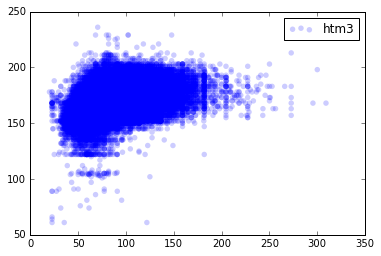

In [49]:
thinkplot.Scatter(weights, heights)
thinkplot.Show()

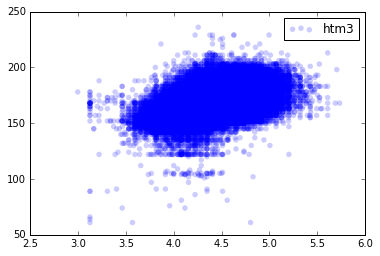

In [50]:
thinkplot.Scatter(logweights, heights)
thinkplot.Show()

This tells me that the intercept the about 68.7cm and the slope is about 23cm per log-pound, which means that when your weight is 0, your height will be 68.7 cm (which doesn't make much sense), and you gain 23cm per log-pound, which is also hard for a person to interpret.

To fix the intercept issue, we can use the intercept at the mean of the data instead:

In [54]:
m = logweights.mean()
print weights.mean(), np.exp(m) # these should be the same, or close
print m
print 68.7 + 23*m

78.925862623 76.7765533047
4.34089929803
168.540683855


This is at least easier to interpret - at the mean of 4.34 log-kg, or about 77 kg, the height intercept is 168cm, which makes sense to a human.  The difference between finding the mean and then making it an exponential to offset the log, or just taking the mean of the original weights is off by a few kg, likely due to rounding of the mean.

What the Least Squares tells us is that the least-squares fit line is at the equation:
height = 23 * ln(weight) + 68.7

A linear model will be saying that every time the weight increased by x kgs, the height should increase by y cm.  A log model can be explained instead of using these definite values, using percentages.  Every time the weight increases by, say, 5%, the height will increase by 23 * ln(1.05), or 1.12cm.  This works no matter the weight:

In [56]:
weight1 = 65
weight2 = weight1*1.05 #increase by 5%
height1 = 23 * np.log(weight1) + 68.7
height2 = 23 * np.log(weight2) + 68.7
print height2 - height1 # should be 1.12

1.1221737759


As you can see by entering different values for weight1, the difference in heights between that and the weight 5% more is always 1.12cm.  This is a good way to explain this model to people, because people are not very well able to think in logs of their weight, but they would likely be able to think in percentage increases.  And 5% is just an example, maybe 10% would be a better way to actually explain the model because 10% is so easy to calculate in your head (moving the decimal place), so we could say that each 10% increase in weight correlates to a 2.2cm increase in height.

Just from looking at the scatterplots, we know that although there does seem to be a positive correlation between height and weight, it's not very strong and there's a lot of noise.

In [60]:
print thinkstats2.CoefDetermination(heights, thinkstats2.Residuals(logweights, heights, inter, slope))

0.273288464105


What this R^2 values tells us is that about 27% of the variation of the residuals (deviants from the best-fit line) can be explained by the relationship between heights and the log of weights.  This is okay, but not really super strong, so if I were trying to guess a friend's height based on their weight, I wouldn't put a lot of money on my prediction.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

I feel like I've been struggling somewhat to get a lot out of the readings and reading questions in particular.  It feels a lot like being presented with a lot of tools (how to make a histogram, how to calculate least-squares, etc), that have been black-boxed and abstracted away from us into functions in the thinkstats2 package.  So I'm learning how to use them but not so much what they do.  To some extent, I see the value in the black-boxes so we can just deal with the results instead of the nitty-gritty, but I feel like, for example, it would have been a valuable learning experience for me to figure out how to make histograms, because I still feel iffy on just the handling and manipulation of the dataframes.

I think I was able to figure out these homework questions less because of what I learned in the reading and more from just what I remembered from taking AP Stats.  I think some questions dedicated to the how and why of the tools we're learning would help me feel more comfortable with them, rather than just applying these tools.  To some extent, I feel the same way about the machine learning algorithms in the warmup project (what is even going on behind the model fitting function?) and even though I now know how to use the logistic model, I don't feel like I fully understand what's going on when I call it.  I think knowing more of that might help me feel more comfortable with the material.  I know this isn't really an enrichment question, sorry.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.